### Importación de datos



In [1]:
import pandas as pd
from matplotlib import pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


tiendas_db = [tienda1, tienda2, tienda3, tienda4]
tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [34]:
def facturacion(lista):
  total_facturado_mdp = []
  for i in range(1, len(lista) + 1):
    tienda = lista[i - 1]
    total = round(tienda['Precio'].sum()/1000000,2)
    total_facturado_mdp.append(total)
  return total_facturado_mdp

total_facturado_mdp = facturacion(tiendas_db)
total_facturado_mdp

[np.float64(1150.88),
 np.float64(1116.34),
 np.float64(1098.02),
 np.float64(1038.38)]

# 2. Ventas por categoría

In [29]:
def ventas_categoria(lista):
  tiendas = {}
  for i in range(1, len(lista) + 1):
    tienda = lista[i - 1]
    ventas_por_categoria = tienda.groupby('Categoría del Producto')['Precio'].sum()
    tiendas[f'tienda_{i}'] = ventas_por_categoria
  return tiendas


categorias_ventas_tiendas = ventas_categoria(tiendas_db)
categorias_ventas_tiendas_total = pd.DataFrame(categorias_ventas_tiendas)
categorias_ventas_tiendas_total.reset_index(inplace = True)
categorias_ventas_tiendas_total

,Categoría del Producto,tienda_1,tienda_2,tienda_3,tienda_4
0,Artículos para el hogar,12698400.0,14746900.0,15060000.0,15074500.0
1,Deportes y diversión,39290000.0,34744500.0,35593100.0,33350100.0
2,Electrodomésticos,363685200.0,348567800.0,329237900.0,283260200.0
3,Electrónicos,429493500.0,410831100.0,410775800.0,409476100.0
4,Instrumentos musicales,91299000.0,104990300.0,77380900.0,75102400.0
5,Juguetes,17995700.0,15945400.0,19401100.0,20262200.0
6,Libros,8784900.0,10091200.0,9498700.0,9321300.0
7,Muebles,187633700.0,176426300.0,201072100.0,192528900.0


# 3. Calificación promedio de la tienda


In [17]:
calificaciones_medias = {}
def calificaciones_promedio(lista):
  for i in range(1, len(lista) + 1):
    tienda = lista[i - 1]
    calificacion_media = round(tienda['Calificación'].mean(), 2)
    calificaciones_medias[f'tienda_{i}'] = calificacion_media
  return calificaciones_medias

calificacion_promedio_tienda = calificaciones_promedio(tiendas_db)
calificacion_promedio_tienda

{'tienda_1': np.float64(3.98),
 'tienda_2': np.float64(4.04),
 'tienda_3': np.float64(4.05),
 'tienda_4': np.float64(4.0)}

# 4. Productos más y menos vendidos

In [27]:
def venta_productos(lista):
  productos_vendidos = {}
  for i in range(1, len(lista) + 1):
    tienda = lista[i - 1]
    productos_vendidos[f'tienda_{i}'] = tienda['Producto'].value_counts()
  return productos_vendidos

productos_vendidos = venta_productos(tiendas_db)
productos_vendidos_df = pd.DataFrame(productos_vendidos)
productos_vendidos_df.reset_index(inplace = True)
productos_vendidos_df.head()

def mas_menos_vendidos(df):
  i = 1
  mas_menos_vendidos = {}
  for tienda in range(1, len(tiendas_db) + 1):
    productos_ordenados = df.sort_values(by = f'tienda_{i}', ascending = False)
    mas_vendidos = productos_ordenados.iloc[0]['Producto']
    menos_vendidos = productos_ordenados.iloc[-1]['Producto']
    if f'tienda_{i}' not in mas_menos_vendidos:
      mas_menos_vendidos[f'tienda_{i}'] = {}
    mas_menos_vendidos[f'tienda_{i}']['mas_vendidos'] = mas_vendidos
    mas_menos_vendidos[f'tienda_{i}']['menos_vendidos'] = menos_vendidos
    i += 1
  return mas_menos_vendidos
mas_menos_vendidos_tiendas = mas_menos_vendidos(productos_vendidos_df)
mas_menos_vendidos_tiendas_df = pd.DataFrame(mas_menos_vendidos_tiendas)
mas_menos_vendidos_tiendas_df.head()

,tienda_1,tienda_2,tienda_3,tienda_4
mas_vendidos,Armario,Iniciando en programación,Kit de bancas,Cama box
menos_vendidos,Auriculares con micrófono,Juego de mesa,Bloques de construcción,Guitarra eléctrica


# 5. Envío promedio por tienda

In [40]:
def envio_tienda(lista):
  envio_promedio = []
  for i in range(1, len(lista) + 1):
    tienda = lista[i - 1]
    envio = round(tienda['Costo de envío'].mean(), 2)
    envio_promedio.append(envio)
  return envio_promedio

envio_promedio_tiendas = envio_tienda(tiendas_db)
envio_promedio_tiendas

#Cálculo de envío total por tienda
def envio_total_tienda(lista):
  envio_total = []
  for i in range(1, len(lista) + 1):
    tienda = lista[i - 1]
    envio = round(tienda['Costo de envío'].sum()/1000000, 2)
    envio_total.append(envio)
  return envio_total
envio_total_tiendas = envio_total_tienda(tiendas_db)
envio_total_tiendas

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
df = pd.DataFrame({'Tiendas': tiendas, 'Ingresos totales en mdp': total_facturado_mdp, 'Envío total en mdp': envio_total_tiendas})
df['Rentabilidad en mdp'] = df['Ingresos totales en mdp'] - df['Envío total en mdp']
df


,Tiendas,Ingresos totales en mdp,Envío total en mdp,Rentabilidad en mdp
0,Tienda 1,1150.88,61.38,1089.50
1,Tienda 2,1116.34,59.49,1056.85
2,Tienda 3,1098.02,58.52,1039.50
3,Tienda 4,1038.38,55.32,983.06


# 6. Gráficos


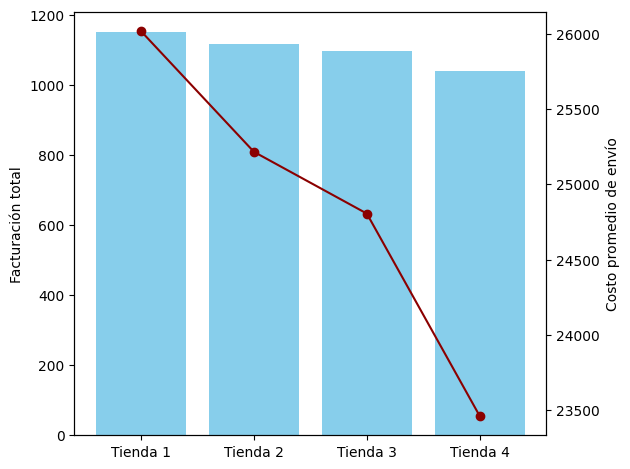

In [42]:
#Visualización sobre facturación total y costo promedio de envío

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
fig, ax1 = plt.subplots()

ax1.bar(tiendas, total_facturado_mdp, color = 'skyblue')
ax1.set_ylabel('Facturación total')


ax2 = ax1.twinx()
ax2.plot(tiendas, envio_promedio_tiendas, color = 'darkred', marker = 'o')
ax2.set_ylabel('Costo promedio de envío')

fig.tight_layout()
plt.show()

Las cuatro tiendas comparten un orden decreciente en dos factores: ventas totales y costo promedio de envío. Si bien Tienda 1 es la que más factura, también es la que tiene el costo de envío más elevado y, caso contrario, Tienda 4 es la que menos factura, pero también la que tiene el costo menos elevado de envío en promedio.

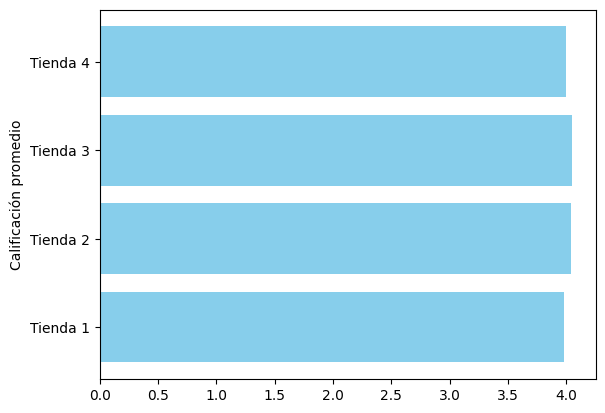

In [26]:
#Visualización sobre las calificaciones obtenidas
fig, ax1 = plt.subplots()
ax1.barh(tiendas, calificacion_promedio_tienda.values(), color = 'skyblue')
ax1.set_ylabel('Calificación promedio')
plt.show()

La tienda 1, si bien es la que más vende, es la que tiene la calificación más baja, aunque las diferencias son menores

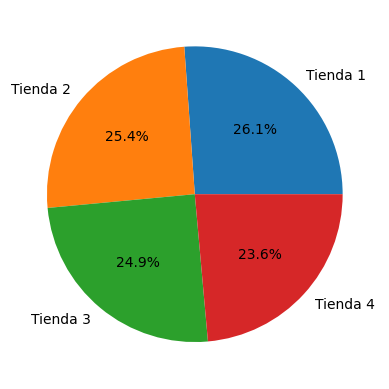

In [43]:
#Visualización rentabilidad con los datos disponibles: ingresos - costo de envío

fig, ax1 = plt.subplots()
ax1.pie(df['Rentabilidad en mdp'], labels = df['Tiendas'], autopct = '%1.1f%%')
plt.show()

Al hacer un análisis de ingresos - costos totales de envío, se concluye que la más rentable sigue siendo la Tienda 1

# 7.Conclusiones y recomendaciones

Tras analizar los datos disponibles sobre las cuatro tiendas, considero que el Sr. Juan debe vender la cuarta tienda, dado que es la que menos rentabilidad deja.

Si bien es la tienda con el costo de envío promedio más bajo, al calcular el costo total de envío y restarlo a los ingresos totales, sigue siendo la que deja las menores ganancias.

En cuanto a la calificación, tiene la segunda peor, entonces lo más viable es que ésta sea vendida.

En el caso de la tienda 1, si bien tiene el costo promedio de envío más elevado de las cuatro, también representa los mayores ingresos y aún considerando el costo total de envío, deja la mayor rentabilidad.

Pero hay un problema, es la que tiene la calificación más baja, por lo tanto se requiere de un trabajo adicional en cuanto a atención al cliente con el fin de elevar el promedio de la calificación recibida, lo que puede traducirse en aún más ventas.